## Nombre: Jessica Morales

# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

--- Representación TF ---
Vocabulario: ['cama', 'cómoda', 'de', 'debajo', 'del', 'el', 'en', 'es', 'escondió', 'estaba', 'gato', 'importante', 'jardín', 'jugaron', 'la', 'limpia', 'limpieza', 'perro', 'se', 'y']

Matriz Término-Documento (TF):
             Doc1  Doc2  Doc3  Doc4
cama           1     1     0     0
cómoda         0     1     0     0
de             1     0     0     0
debajo         1     0     0     0
del            0     0     0     1
el             1     0     3     0
en             0     0     1     0
es             0     0     0     1
escondió       1     0     0     0
estaba         0     1     0     0
gato           1     0     1     0
importante     0     0     0     1
jardín         0     0     1     1
jugaron        0     0     1     0
la             1     1     0     1
limpia         0     1     0     0
limpieza       0     0     0     1
perro          0     0     1     0
se             1     0     0     0
y              0     1     1     0

--- Representación 

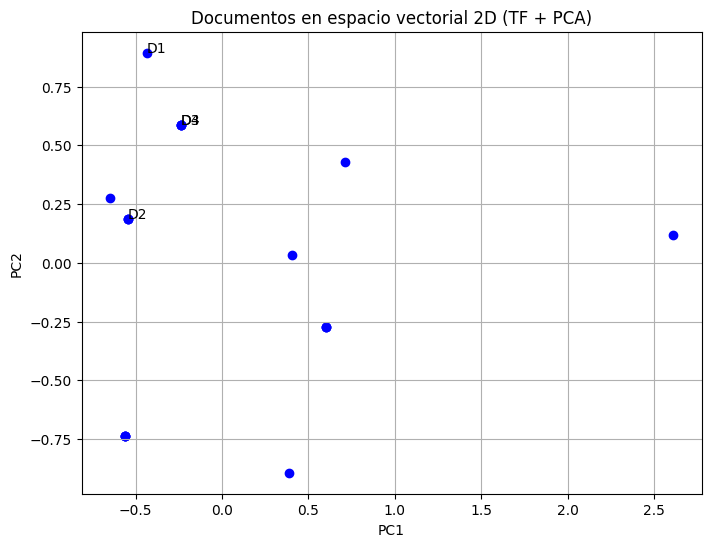

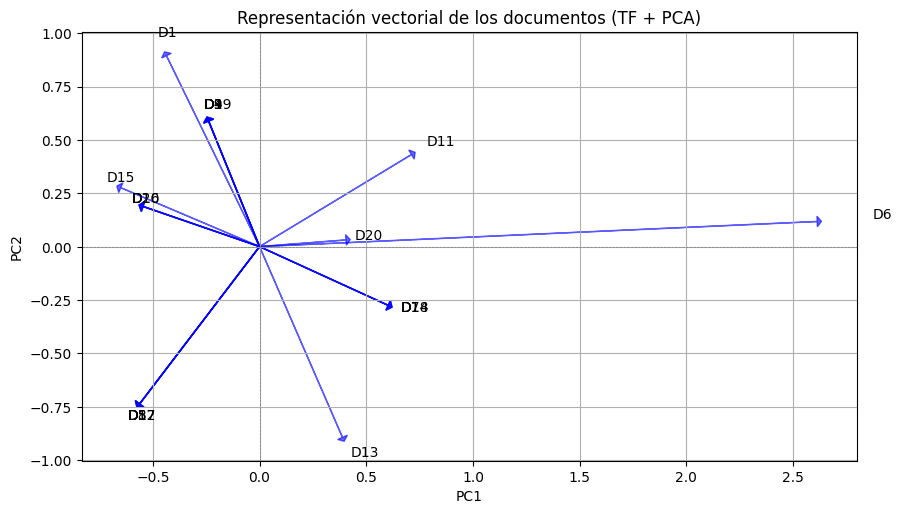


--- Visualización 2D (TF-IDF + PCA) ---


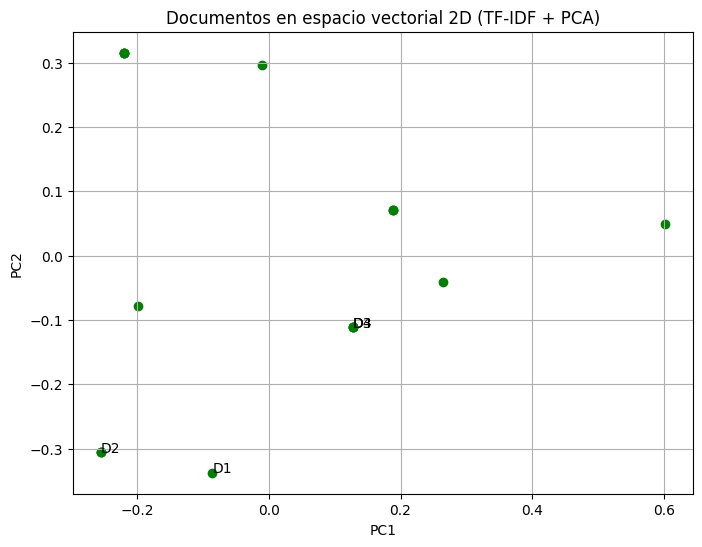

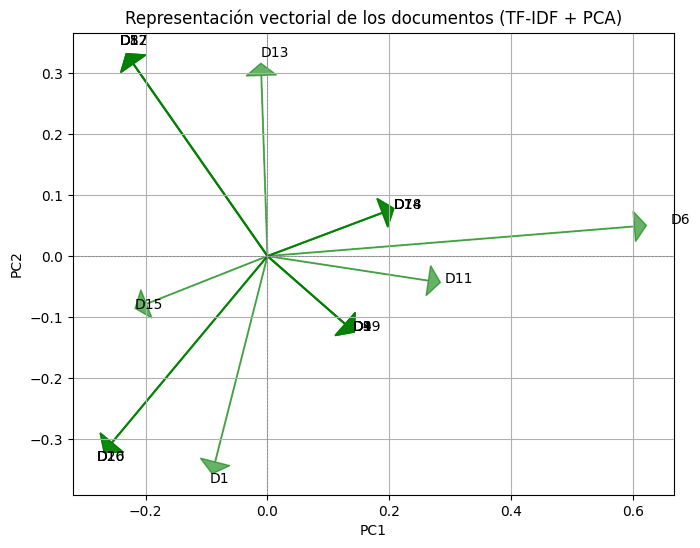

In [22]:
# Importa las bibliotecas necesarias
import pandas as pd # Pandas se utiliza para la manipulación y análisis de datos, especialmente para trabajar con DataFrames (estructuras de datos tabulares).
from sklearn.feature_extraction.text import TfidfVectorizer # TfidfVectorizer se utiliza para convertir una colección de documentos de texto sin procesar en una matriz de características TF-IDF.
from sklearn.decomposition import PCA # PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que se utiliza para proyectar datos de alta dimensión a un espacio de menor dimensión.
import matplotlib.pyplot as plt # Matplotlib es una biblioteca para la creación de gráficos y visualizaciones en Python.
import numpy as np # NumPy es una biblioteca para computación numérica en Python, que proporciona soporte para arrays multidimensionales.

# Define la lista de documentos que componen el corpus.
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# 1. Representación TF (Frecuencia Absoluta)
print("--- Representación TF ---")
vocab = set() # Inicializa un conjunto vacío para almacenar el vocabulario único de todos los documentos.
for doc in documents: # Itera sobre cada documento en la lista de documentos.
    for word in doc.lower().strip('.').split(): # Convierte el documento a minúsculas, elimina los puntos al final y luego divide el documento en palabras utilizando el espacio como delimitador.
        vocab.add(word) # Añade cada palabra al conjunto 'vocab'. Los conjuntos automáticamente eliminan duplicados, asegurando un vocabulario único.
vocab = sorted(list(vocab))  # Convierte el conjunto 'vocab' a una lista y la ordena alfabéticamente para consistencia.
print("Vocabulario:", vocab) # Imprime el vocabulario único y ordenado.

tf_matrix_data = [] # Inicializa una lista vacía para almacenar los datos de la matriz TF.
for doc in documents: # Itera sobre cada documento.
    doc_tf = {} # Inicializa un diccionario vacío para almacenar la frecuencia de cada término en el documento actual.
    for term in vocab: # Itera sobre cada término en el vocabulario.
        doc_tf[term] = doc.lower().strip('.').split().count(term) # Cuenta el número de veces que aparece el 'term' en el documento actual (después de convertirlo a minúsculas, eliminar el punto final y dividirlo en palabras) y lo almacena en el diccionario 'doc_tf'.
    tf_matrix_data.append(doc_tf) # Añade el diccionario de frecuencias del documento actual a la lista 'tf_matrix_data'.

tf_df = pd.DataFrame(tf_matrix_data) # Crea un DataFrame de Pandas a partir de la lista de diccionarios 'tf_matrix_data'. Cada fila representa un documento y cada columna representa un término del vocabulario, con el valor siendo la frecuencia del término en el documento.
# Transpone el DataFrame para que los términos estén en las filas y los documentos en las columnas.
tf_df = tf_df.T
# Establece el índice del DataFrame al vocabulario después de la transposición.
tf_df = tf_df.set_index(pd.Index(vocab))
# Establece nombres de columna personalizados para los documentos después de la transposición.
tf_df.columns = ['Doc' + str(i + 1) for i in range(len(documents))]

print("\nMatriz Término-Documento (TF):\n", tf_df) # Imprime la matriz término-documento con las frecuencias absolutas (TF).


# 2. Representación TF-IDF
print("\n--- Representación TF-IDF ---")
vectorizer = TfidfVectorizer() # Inicializa un objeto TfidfVectorizer. Este objeto se utilizará para calcular los valores TF-IDF de los documentos.
tfidf_matrix = vectorizer.fit_transform(documents) # Aprende el vocabulario y calcula la matriz TF-IDF de los documentos. El resultado es una matriz dispersa.

# Crea un DataFrame para TF-IDF utilizando los nombres de las características (términos) como índice.
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
# Transpone el DataFrame para que los términos estén en las filas y los documentos en las columnas.
tfidf_df = tfidf_df.T

print("\nMatriz Término-Documento (TF-IDF):\n", tfidf_df) # Imprime la matriz término-documento con los valores TF-IDF.

# 3. Visualización en 2D usando PCA (para TF)
print("\n--- Visualización 2D (TF + PCA) ---")
pca_tf = PCA(n_components=2) # Inicializa un objeto PCA para reducir la dimensionalidad a 2 componentes principales.
docs_2d_tf = pca_tf.fit_transform(tf_df) # Aplica PCA a la matriz TF (transpuesta) para obtener las coordenadas de los documentos en un espacio de 2 dimensiones.

plt.figure(figsize=(8, 6)) # Crea una nueva figura para el gráfico con un tamaño específico.
plt.scatter(docs_2d_tf[:, 0], docs_2d_tf[:, 1], color='blue') # Crea un gráfico de dispersión de los documentos en 2D, utilizando la primera y segunda componente principal como coordenadas.
for i, txt in enumerate(["D1", "D2", "D3", "D4"]): # Itera sobre los índices y las etiquetas de los documentos.
    plt.annotate(txt, (docs_2d_tf[i, 0], docs_2d_tf[i, 1])) # Añade una etiqueta de texto para cada punto del documento en el gráfico.
plt.title("Documentos en espacio vectorial 2D (TF + PCA)") # Establece el título del gráfico.
plt.xlabel("PC1") # Establece la etiqueta del eje x (Primera Componente Principal).
plt.ylabel("PC2") # Establece la etiqueta del eje y (Segunda Componente Principal).
plt.grid(True) # Muestra una cuadrícula en el gráfico.
plt.show() # Muestra el gráfico.

plt.figure(figsize=(10, 6)) # Crea una nueva figura para la representación vectorial con un tamaño específico.
for i, (x, y) in enumerate(docs_2d_tf): # Itera sobre los índices y las coordenadas 2D de los documentos.
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.02, fc='blue', ec='blue', alpha=0.6) # Dibuja una flecha desde el origen (0,0) hasta las coordenadas del documento, representando el vector del documento.
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10) # Añade una etiqueta de texto para cada vector de documento.

plt.title("Representación vectorial de los documentos (TF + PCA)") # Establece el título del gráfico.
plt.xlabel("PC1") # Establece la etiqueta del eje x.
plt.ylabel("PC2") # Establece la etiqueta del eje y.
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5) # Dibuja una línea horizontal en el eje y=0.
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5) # Dibuja una línea vertical en el eje x=0.
plt.grid(True) # Muestra una cuadrícula.
plt.gca().set_aspect('equal', adjustable='box') # Asegura que los ejes tengan la misma escala.
plt.show() # Muestra el gráfico.

# 4. Visualización en 2D usando PCA (para TF-IDF)
print("\n--- Visualización 2D (TF-IDF + PCA) ---")
pca_tfidf = PCA(n_components=2) # Inicializa un objeto PCA para reducir la dimensionalidad de la matriz TF-IDF a 2 componentes principales.
docs_2d_tfidf = pca_tfidf.fit_transform(tfidf_df.values) # Aplica PCA a los valores de la matriz TF-IDF (transpuesta) para obtener las coordenadas de los documentos en un espacio de 2 dimensiones. Se usa .values para obtener la representación numérica del DataFrame.

plt.figure(figsize=(8, 6)) # Crea una nueva figura para el gráfico de dispersión.
plt.scatter(docs_2d_tfidf[:, 0], docs_2d_tfidf[:, 1], color='green') # Crea un gráfico de dispersión de los documentos en 2D, utilizando las componentes principales obtenidas de TF-IDF.
for i, txt in enumerate(["D1", "D2", "D3", "D4"]): # Itera sobre los índices y etiquetas de los documentos.
    plt.annotate(txt, (docs_2d_tfidf[i, 0], docs_2d_tfidf[i, 1])) # Añade etiquetas de texto a los puntos del gráfico.
plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)") # Establece el título del gráfico.
plt.xlabel("PC1") # Establece la etiqueta del eje x.
plt.ylabel("PC2") # Establece la etiqueta del eje y.
plt.grid(True) # Muestra la cuadrícula.
plt.show() # Muestra el gráfico.

plt.figure(figsize=(10, 6)) # Crea una nueva figura para la representación vectorial.
for i, (x, y) in enumerate(docs_2d_tfidf): # Itera sobre los índices y las coordenadas 2D de los documentos obtenidas de TF-IDF.
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.02, fc='green', ec='green', alpha=0.6) # Dibuja vectores desde el origen hasta las coordenadas de los documentos.
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10) # Añade etiquetas de texto a los vectores.

plt.title("Representación vectorial de los documentos (TF-IDF + PCA)") # Establece el título del gráfico.
plt.xlabel("PC1") # Establece la etiqueta del eje x.
plt.ylabel("PC2") # Establece la etiqueta del eje y.
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5) # Dibuja una línea horizontal en y=0.
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5) # Dibuja una línea vertical en x=0.
plt.grid(True) # Muestra la cuadrícula.
plt.gca().set_aspect('equal', adjustable='box') # Asegura que los ejes tengan la misma escala.
plt.show() # Muestra el gráfico.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


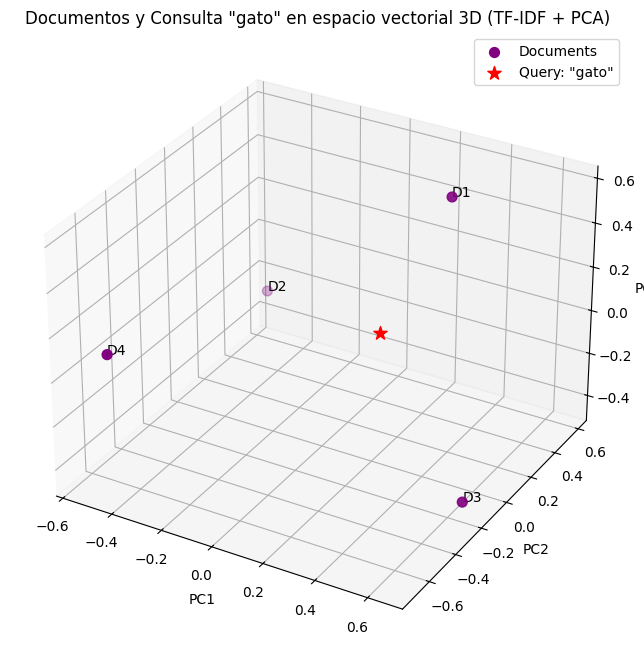

In [23]:
# Importa las bibliotecas necesarias para la visualización 3D, el cálculo de TF-IDF, la reducción de dimensionalidad y la manipulación de datos.
from mpl_toolkits.mplot3d import Axes3D # Para crear gráficos tridimensionales.
from sklearn.feature_extraction.text import TfidfVectorizer # Para convertir texto en una matriz TF-IDF.
from sklearn.decomposition import PCA # Para realizar el Análisis de Componentes Principales (PCA).
import matplotlib.pyplot as plt # Para la creación de gráficos.
import pandas as pd # Para la manipulación de datos en forma de DataFrames.

# Define la lista de documentos que componen el corpus.
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# Representación TF-IDF
vectorizer = TfidfVectorizer() # Inicializa un objeto TfidfVectorizer para calcular la representación TF-IDF de los documentos.
tfidf_matrix = vectorizer.fit_transform(documents) # Ajusta el vectorizador a los documentos y luego transforma los documentos en una matriz TF-IDF.
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out()).T # Crea un DataFrame de Pandas a partir de la matriz TF-IDF. .toarray() convierte la matriz dispersa en un array denso. get_feature_names_out() obtiene los términos (palabras) como nombres de columna. Finalmente, se transpone la matriz para que los términos sean las filas y los documentos las columnas.

# PCA para la reducción de dimensionalidad a 3 componentes principales.
pca_tfidf_3d = PCA(n_components=3) # Inicializa un objeto PCA para reducir la dimensionalidad a 3 componentes.
docs_3d_tfidf = pca_tfidf_3d.fit_transform(tfidf_df.T) # Aplica PCA a la transpuesta de la matriz TF-IDF (donde cada fila representa un documento) para obtener las coordenadas de los documentos en un espacio de 3 dimensiones.

# Define la consulta
query = "gato" # Define la consulta de búsqueda como la palabra "gato".
query_vector = vectorizer.transform([query]) # Transforma la consulta utilizando el mismo vectorizador TF-IDF que se ajustó a los documentos. Esto asegura que la consulta esté representada en el mismo espacio vectorial.

# Proyecta el vector de la consulta al espacio PCA utilizando el mismo objeto PCA.
# Asegúrate de transponer query_vector para que coincida con la forma esperada por PCA.
query_3d = pca_tfidf_3d.transform(query_vector.toarray()) # Aplica la misma transformación PCA al vector de la consulta para obtener su representación en el espacio de 3 dimensiones. .toarray() convierte la matriz dispersa en un array denso.

# Visualización 3D
fig = plt.figure(figsize=(10, 8)) # Crea una nueva figura para el gráfico 3D con un tamaño específico.
ax = fig.add_subplot(111, projection='3d') # Añade un subgráfico 3D a la figura.

# Grafica los documentos
ax.scatter(docs_3d_tfidf[:, 0], docs_3d_tfidf[:, 1], docs_3d_tfidf[:, 2], color='purple', s=50, label='Documents') # Crea un gráfico de dispersión 3D para los documentos, utilizando las tres componentes principales como coordenadas.
for i, txt in enumerate(["D1", "D2", "D3", "D4"]): # Itera sobre los índices y las etiquetas de los documentos.
    ax.text(docs_3d_tfidf[i, 0], docs_3d_tfidf[i, 1], docs_3d_tfidf[i, 2], txt) # Añade etiquetas de texto para cada punto del documento en el gráfico 3D.

# Grafica la consulta
ax.scatter(query_3d[:, 0], query_3d[:, 1], query_3d[:, 2], color='red', s=100, marker='*', label='Query: "gato"') # Grafica la consulta como un punto rojo con un marcador de estrella en el espacio 3D.

# Establece las etiquetas de los ejes y el título del gráfico.
ax.set_xlabel('PC1') # Etiqueta del eje x (Primera Componente Principal).
ax.set_ylabel('PC2') # Etiqueta del eje y (Segunda Componente Principal).
ax.set_zlabel('PC3') # Etiqueta del eje z (Tercera Componente Principal).
ax.set_title('Documentos y Consulta "gato" en espacio vectorial 3D (TF-IDF + PCA)') # Título del gráfico.

# Añade una leyenda para identificar los documentos y la consulta.
ax.legend()

plt.show() # Muestra el gráfico 3D.


--- Visualización 3D (TF-IDF + PCA) ---


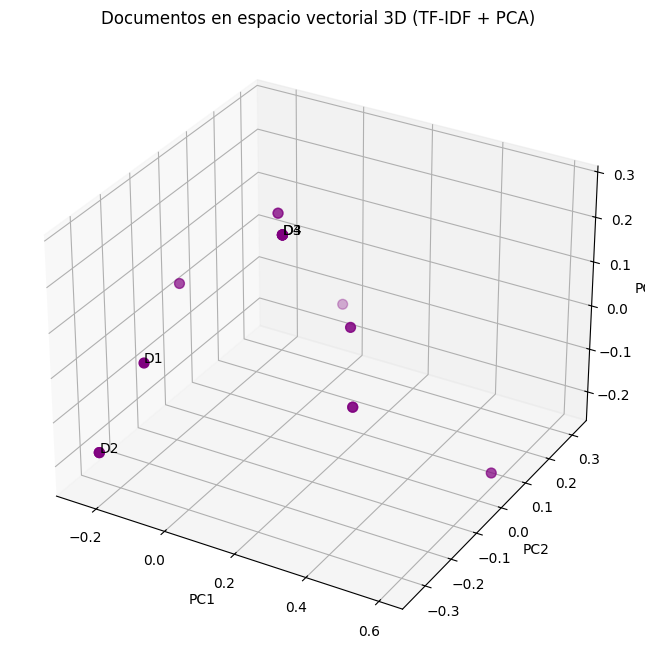

In [27]:
from mpl_toolkits.mplot3d import Axes3D # Importa la biblioteca para crear gráficos 3D.

# Visualización en 3D usando PCA (para TF-IDF)
print("\n--- Visualización 3D (TF-IDF + PCA) ---")
pca_tfidf_3d = PCA(n_components=3) # Inicializa un objeto PCA para reducir la dimensionalidad de los datos TF-IDF a 3 componentes principales.
docs_3d_tfidf = pca_tfidf_3d.fit_transform(tfidf_df) # Aplica PCA a la matriz TF-IDF (que ya debería estar definida en el código anterior) para obtener las coordenadas de los documentos en un espacio de 3 dimensiones.

fig = plt.figure(figsize=(10, 8)) # Crea una nueva figura para el gráfico con un tamaño específico (ancho=10 pulgadas, alto=8 pulgadas).
ax = fig.add_subplot(111, projection='3d') # Añade un subgráfico a la figura. El '111' indica que habrá una sola gráfica en la figura, y 'projection='3d'' especifica que este subgráfico será en 3D.

ax.scatter(docs_3d_tfidf[:, 0], docs_3d_tfidf[:, 1], docs_3d_tfidf[:, 2], color='purple', s=50) # Crea un gráfico de dispersión 3D.
# - docs_3d_tfidf[:, 0]: Coordenadas en el primer componente principal (eje x).
# - docs_3d_tfidf[:, 1]: Coordenadas en el segundo componente principal (eje y).
# - docs_3d_tfidf[:, 2]: Coordenadas en el tercer componente principal (eje z).
# - color='purple': Establece el color de los puntos a púrpura.
# - s=50: Establece el tamaño de los puntos a 50.
for i, txt in enumerate(["D1", "D2", "D3", "D4"]): # Itera sobre los índices (i) y las etiquetas de los documentos (txt).
    ax.text(docs_3d_tfidf[i, 0], docs_3d_tfidf[i, 1], docs_3d_tfidf[i, 2], txt) # Añade una etiqueta de texto (D1, D2, D3, D4) a cada punto del documento en el gráfico 3D, ubicándola en sus respectivas coordenadas.

ax.set_xlabel('PC1') # Establece la etiqueta del eje x como 'PC1' (Primera Componente Principal).
ax.set_ylabel('PC2') # Establece la etiqueta del eje y como 'PC2' (Segunda Componente Principal).
ax.set_zlabel('PC3') # Establece la etiqueta del eje z como 'PC3' (Tercera Componente Principal).
ax.set_title('Documentos en espacio vectorial 3D (TF-IDF + PCA)') # Establece el título del gráfico.
plt.show() # Muestra el gráfico 3D.

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

Ingresa tu consulta: gato


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(



Similitud Coseno entre la consulta y los documentos:
Documento 1: 0.3148
Documento 2: 0.0000
Documento 3: 0.2514
Documento 4: 0.0000


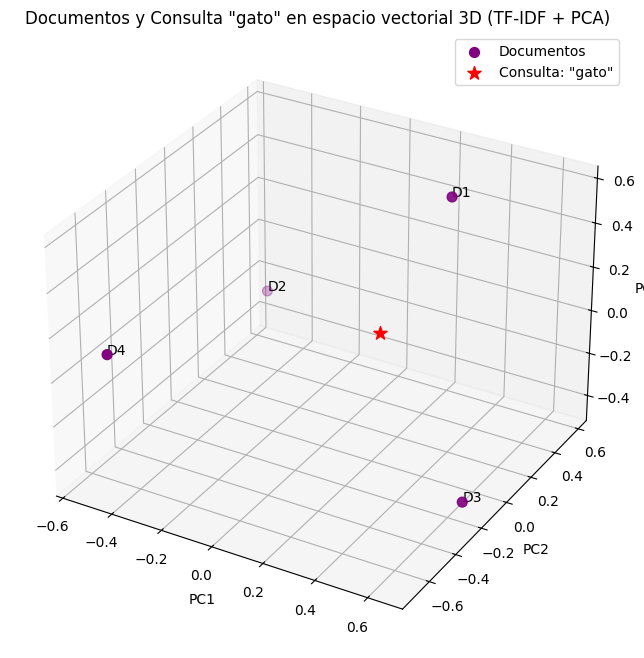

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


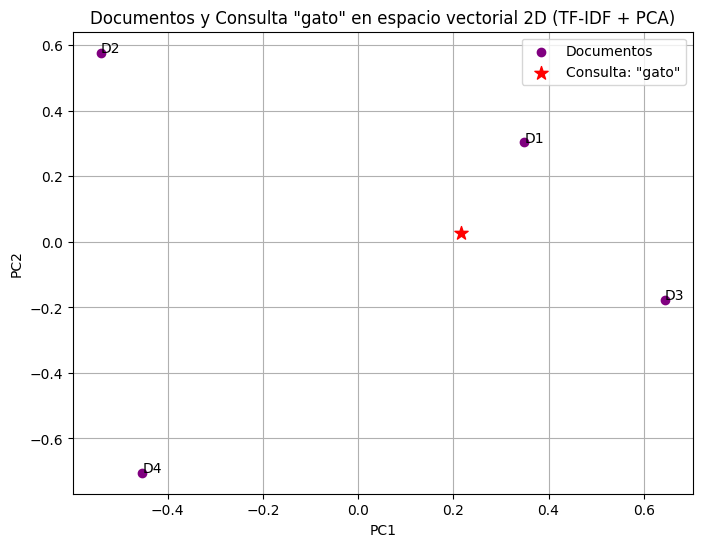

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out()).T

# Reducción de dimensionalidad a 3D usando PCA
pca_tfidf_3d = PCA(n_components=3)
docs_3d_tfidf = pca_tfidf_3d.fit_transform(tfidf_df.T)

# Ingresar la consulta
query = input("Ingresa tu consulta: ")

# Representar la consulta en el mismo espacio vectorial
query_vector = vectorizer.transform([query])

# Proyectar la consulta al espacio PCA
query_3d = pca_tfidf_3d.transform(query_vector.toarray())

# Calcular la similitud coseno entre la consulta y cada documento
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
print("\nSimilitud Coseno entre la consulta y los documentos:")
for i, similarity in enumerate(cosine_similarities[0]):
    print(f"Documento {i+1}: {similarity:.4f}")

# Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los documentos
ax.scatter(docs_3d_tfidf[:, 0], docs_3d_tfidf[:, 1], docs_3d_tfidf[:, 2], color='purple', s=50, label='Documentos')
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    ax.text(docs_3d_tfidf[i, 0], docs_3d_tfidf[i, 1], docs_3d_tfidf[i, 2], txt)

# Graficar la consulta
ax.scatter(query_3d[:, 0], query_3d[:, 1], query_3d[:, 2], color='red', s=100, marker='*', label=f'Consulta: "{query}"')

# Establecer etiquetas y título
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'Documentos y Consulta "{query}" en espacio vectorial 3D (TF-IDF + PCA)')

# Añadir leyenda
ax.legend()

plt.show()

# Visualización 2D (opcional)
pca_tfidf_2d = PCA(n_components=2)
docs_2d_tfidf = pca_tfidf_2d.fit_transform(tfidf_df.T)
query_2d = pca_tfidf_2d.transform(query_vector.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(docs_2d_tfidf[:, 0], docs_2d_tfidf[:, 1], color='purple', label='Documentos')
plt.scatter(query_2d[:, 0], query_2d[:, 1], color='red', marker='*', s=100, label=f'Consulta: "{query}"')
for i, txt in enumerate(["D1", "D2", "D3", "D4"]):
    plt.annotate(txt, (docs_2d_tfidf[i, 0], docs_2d_tfidf[i, 1]))
plt.title(f'Documentos y Consulta "{query}" en espacio vectorial 2D (TF-IDF + PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

Ingresa tu consulta para buscar documentos: limpia

Documentos más relevantes para la consulta: 'limpia'
Documento 2: 'La cama estaba limpia y cómoda.' (Similitud: 0.4982)
Documento 1: 'El gato se escondió debajo de la cama.' (Similitud: 0.0000)


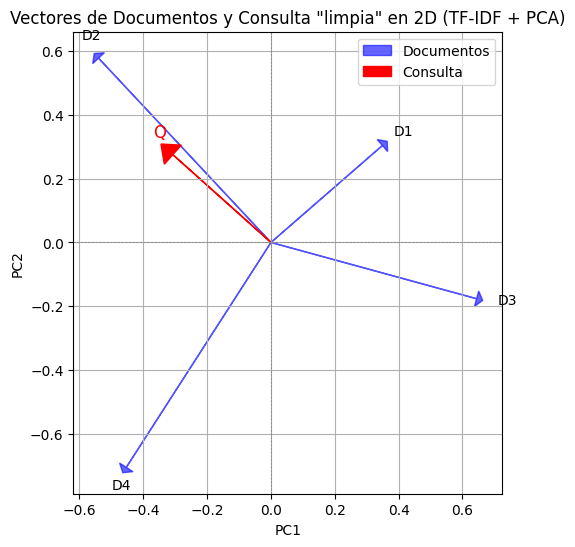

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

# Inicializar el vectorizador TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

def buscar_documentos(consulta, tfidf_matrix, vectorizer, documents, top_n=2): # Se cambió el nombre del argumento 'documentos' a 'documents' para que coincida con la variable global.
    consulta_vector = vectorizer.transform([consulta])
    cosine_similarities = cosine_similarity(consulta_vector, tfidf_matrix)[0]
    ranked_documents = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)
    return ranked_documents[:top_n]

# Ingresar la consulta
query = input("Ingresa tu consulta para buscar documentos: ")

# Obtener los documentos más relevantes
resultados = buscar_documentos(query, tfidf_matrix, vectorizer, documents) # Se pasa la variable global 'documents' como argumento a la función.

print(f"\nDocumentos más relevantes para la consulta: '{query}'")
for indice, similitud in resultados:
    print(f"Documento {indice + 1}: '{documents[indice]}' (Similitud: {similitud:.4f})")

# Visualización en 2D
pca_2d = PCA(n_components=2)
docs_2d = pca_2d.fit_transform(tfidf_matrix.toarray())
query_vector_2d = pca_2d.transform(vectorizer.transform([query]).toarray())

plt.figure(figsize=(10, 6))

# Dibujar los vectores de los documentos
for i, (x, y) in enumerate(docs_2d):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.02, fc='blue', ec='blue', alpha=0.6, label='Documentos' if i == 0 else "")
    plt.text(x * 1.1, y * 1.1, f'D{i+1}', fontsize=10)

# Dibujar el vector de la consulta
plt.arrow(0, 0, query_vector_2d[0, 0], query_vector_2d[0, 1], head_width=0.08, head_length=0.05, fc='red', ec='red', label='Consulta')
plt.text(query_vector_2d[0, 0] * 1.2, query_vector_2d[0, 1] * 1.2, 'Q', fontsize=12, color='red')

plt.title(f'Vectores de Documentos y Consulta "{query}" en 2D (TF-IDF + PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()